In [1]:
import warnings
import os 
import pickle

import numpy as np
import pandas as pd
import seaborn as sns

warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
def get_data(filename:str) -> tuple:
    path = os.path.join("datasets", filename)
    with open(path, "rb") as file:
        data = pickle.load(file)
    return data

In [3]:
classification_data = get_data("classification_data.pickle")

In [4]:
regression_data = get_data("regression_data.pickle")

Random Forest Classifier - Train set

In [5]:
X_train, y_train, X_test, y_test = classification_data

In [6]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

# Perform a 10-fold cross validation
scores = cross_val_score(rfc, X, y, cv=10)

In [8]:
pd.DataFrame(scores, columns=["Random Forest CV"], index=np.arange(1, scores.shape[0]+1))

,Random Forest CV
1,0.962264
2,1.000000
3,0.971698
4,0.943396
5,1.000000
6,0.990566
7,0.971698
8,0.952830
9,1.000000
10,1.000000


In [9]:
params = {
    # 'n_estimators' rappresenta il numero di alberi nella foresta. Di solito il
    # numero più alto di alberi è il migliore per apprendere i dati. Tuttavia, 
    # aggiungendo molti alberi può rallentare notevolmente il processo di addestramento, 
    # quindi di solito usiamo un numero ragionevole a seconda delle dimensioni del dataset.
    'n_estimators': [10, 100, 200, 500],

    # 'max_depth' rappresenta la profondità di ciascun albero nella foresta. 
    # Più profondo è l'albero, più suddivisioni ha e cattura più informazioni sui dati 
    # e questa è la profondità massima a cui può crescere ciascun albero.
    'max_depth': [3, 6, 10, 20],

    # 'min_samples_split' rappresenta il numero minimo di campioni necessari per dividere un nodo interno.
    # Questo può variare tra considerare almeno un campione in ciascun nodo 
    # a considerare tutti i campioni in ciascun nodo. Quando aumentiamo questo parametro,
    # l'albero diventa più vincolato in quanto deve considerare più campioni in ciascun nodo.
    'min_samples_split': [2, 5, 10],

    # 'min_samples_leaf' è il numero minimo di campioni richiesti per essere in un nodo foglia.
    # Questo parametro è simile a min_samples_splits, tuttavia, descrive il numero minimo di
    # campioni alle foglie, alla base dell'albero.
    'min_samples_leaf': [1, 2, 4],

    # 'max_features' rappresenta il numero di caratteristiche da considerare quando si cerca
    # la migliore suddivisione. Queste saranno selezionate in modo casuale. 
    # Come regola generale, la radice quadrata del numero totale di caratteristiche funziona
    # alla grande ma dovremmo controllare fino al 30-40% del numero totale di caratteristiche.
    'max_features': ['auto', 'sqrt'],

    # 'bootstrap' viene utilizzato per il campionamento avviato. Ciò significa che per ogni albero
    # che viene costruito, considererebbe un insieme / sottoinsieme di righe distinte. Generalmente, 
    # l'opzione di avvio è impostata su True per un modello Random Forest.
    'bootstrap': [True, False],

    # 'criterion' è la funzione per misurare la qualità di una divisione. "gini" è per l'impurità di Gini 
    # e "entropy" è per il guadagno di informazione.
    'criterion': ['gini', 'entropy']
}

In [10]:
from sklearn.model_selection import GridSearchCV

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=params, cv=5, n_jobs=-1)

# Perform the grid search
grid_search.fit(X, y)

/Users/akmalsoliev/coding/work/Python-Data-Science/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
2880 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2184 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/akmalsoliev/coding/work/Python-Data-Science/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/akmalsoliev/coding/work/Python-Data-Science/.venv/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/akmalsoliev/coding/work/Python-Data-

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 100, 200, 500]})

In [11]:
best_params = grid_search.best_params_
best_params

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 500}

In [12]:
print("GridSearchCV best score: {:.2%}".format(grid_search.best_score_))

GridSearchCV best score: 98.20%


In [13]:
rfc.set_params(**best_params)

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=500, random_state=42)

In [14]:
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=500, random_state=42)

In [15]:
y_pred = rfc.predict(X_test)

In [16]:
from sklearn.metrics import classification_report

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        95
         1.0       1.00      0.91      0.95        11

    accuracy                           0.99       106
   macro avg       0.99      0.95      0.97       106
weighted avg       0.99      0.99      0.99       106



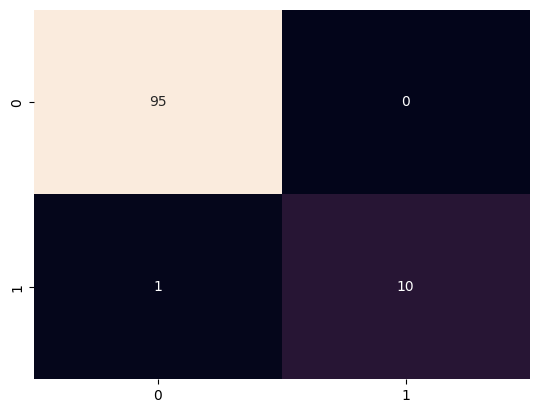

In [18]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False);